In [1]:
import sys; sys.path.append('..')
import inflation, mesh, sheet_meshing
from tri_mesh_viewer import TriMeshViewer as Viewer
import triangulation
import numpy as np
import utils, py_newton_optimizer, benchmark

In [2]:
  V, E = mesh.load_raw('data/ForwardDesign/sleeve3.obj')
  fusedPts = list(np.loadtxt('data/ForwardDesign/fuse_sleeve.txt').reshape((-1, 2)))
  holePts = []  # or load from file if you want, but it should be empty

In [3]:
m, iwv, iwbv = sheet_meshing.forward_design_mesh(V, E, fusedPts, holePts, np.prod(utils.bbox_dims(V)[0:2]) / 1e4)
isheet = inflation.InflatableSheet(m, iwv)

Renderer(camera=PerspectiveCamera(children=(PointLight(color='#999999', position=(0.0, 0.0, 5.0), quaternion=(…

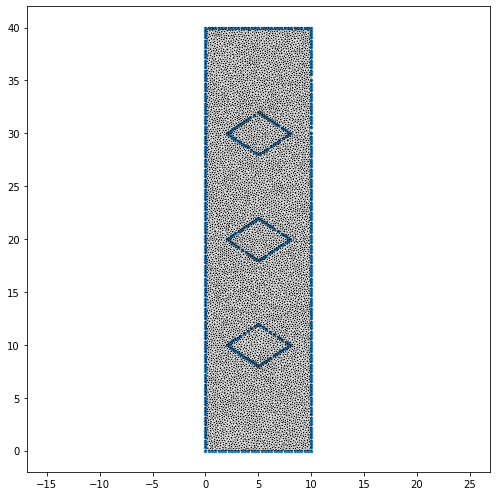

In [5]:
import visualization
visualization.plot_2d_mesh(m, pointList=np.where(iwv))

viewer = Viewer(isheet, wireframe=True)
viewer.show()

In [7]:
import time
import benchmark
import py_newton_optimizer

benchmark.reset()
isheet.setUseTensionFieldEnergy(True)
isheet.setUseHessianProjectedEnergy(False)
opts = py_newton_optimizer.NewtonOptimizerOptions()
opts.niter = 500
isheet.pressure = 1

# If you want to see the inflation progress in the viewer:
framerate = 5  # Update every 5 iterations
def cb(it):
    if it % framerate == 0:
        viewer.update()

cr = inflation.inflation_newton(isheet, isheet.rigidMotionPinVars, opts, callback=cb)
benchmark.report()

InflatableSheet setVars	0.0046401	1
Newton iterations	0.016402	1
    InflatableSheet energy	0.000429153	1
    Newton iterate	0.015121	1
        Preamble	0.0151079	1
            Callback	0.012538	1
            InflatableSheet energy	0.00058198	1
            InflatableSheet gradient	0.00122881	1
Full time	0.0526021


In [9]:
from tri_mesh_viewer import TriMeshViewer as Viewer
viewer = Viewer(isheet, wireframe=True)
viewer.show()

Renderer(camera=PerspectiveCamera(children=(PointLight(color='#999999', position=(0.0, 0.0, 5.0), quaternion=(…

Step-by-step: Save Inflation Video

In [10]:
#Create the InflatableSheet and the Offscreen Viewer:
from tri_mesh_viewer import OffscreenTriMeshViewer
isheet = inflation.InflatableSheet(m, iwv)  # or use np.array(iwv) != 0 if needed
oview = OffscreenTriMeshViewer(isheet, width=768, height=640, wireframe=True)

In [11]:
#Set up the optimizer and start recording
import benchmark
opts = py_newton_optimizer.NewtonOptimizerOptions()
opts.niter = 1000  # or your preferred number of iterations

benchmark.reset()
oview.recordStart('sleeve3.mp4')  # Output video filename
isheet.pressure = 1  # Adjust pressure as needed

In [12]:
#Run the simulation and update the viewer:
cr = inflation.inflation_newton(
    isheet,
    isheet.rigidMotionPinVars,
    opts,
    callback=lambda it: oview.update()
)
benchmark.report()
oview.recordStop()

InflatableSheet setVars	0.00323915	1
Newton iterations	47.9616	1
    InflatableSheet energy	0.000746012	1
    Newton iterate	47.9598	67
        Backtracking	0.466541	66
            InflatableSheet energy	0.100029	130
            InflatableSheet setVars	0.35911	130
        Compute descent direction	37.4798	66
            newton_step	37.4795	66
                Newton solve	35.6405	89
                    CHOLMOD Numeric Factorize	34.5755	88
                    Solve	0.878142	67
                        CHOLMOD Backsub	0.638278	66
                        CHOLMOD Numeric Factorize	0.0737109	1
                        CHOLMOD Symbolic Factorize	0.155584	1
                hessEval	1.74599	66
                largestMagnitudeEigenvalue	0.0738051	3
        Preamble	9.98368	67
            Callback	9.78231	67
            InflatableSheet energy	0.0825896	67
            InflatableSheet gradient	0.100719	67
Full time	48.6544
